<a target="_blank" href="https://colab.research.google.com/github/charecktowa/Chemistry-ML/blob/paper/paper/plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

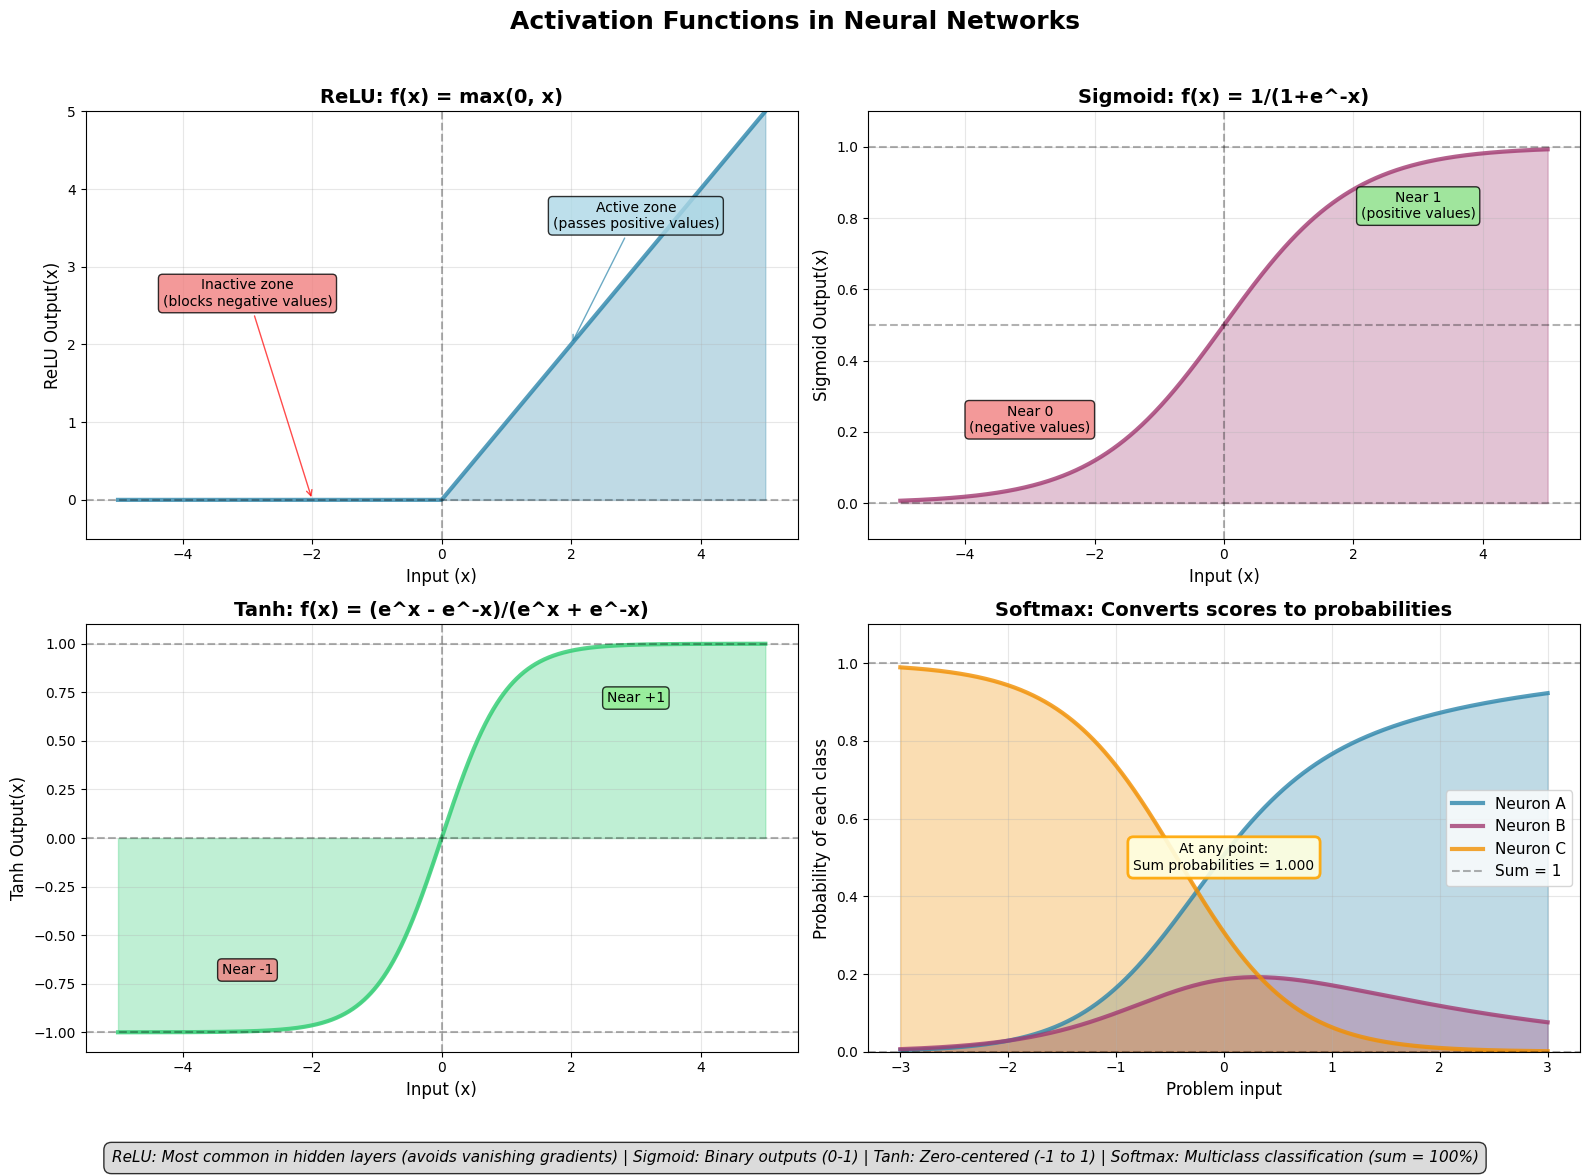

In [3]:
# @title
# Visualization of the most common activation functions
def plot_activation_functions():
    """Visualizes activation functions with project styling"""

    x = np.linspace(-5, 5, 1000)

    # Activation functions
    relu = np.maximum(0, x)
    sigmoid = 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip for numerical stability
    tanh = np.tanh(x)

    # For softmax, we need an example with multiple outputs
    # We'll use 3 example functions to show how softmax normalizes
    x_soft = np.linspace(-3, 3, 1000)
    y1 = x_soft + 1
    y2 = 0.5 * x_soft
    y3 = -x_soft + 0.5

    # Apply softmax
    exp_vals = np.exp(np.array([y1, y2, y3]) - np.max(np.array([y1, y2, y3]), axis=0))
    softmax_vals = exp_vals / np.sum(exp_vals, axis=0)

    # Configure subplot with project styling
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Colors consistent with project
    colors = ["#2E86AB", "#A23B72", "#F18F01", "#2ecc71"]

    # 1. ReLU
    axes[0, 0].plot(x, relu, color=colors[0], linewidth=3, alpha=0.8)
    axes[0, 0].fill_between(x, 0, relu, where=(relu > 0), alpha=0.3, color=colors[0])
    axes[0, 0].set_title("ReLU: f(x) = max(0, x)", fontsize=14, fontweight="bold")
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axhline(y=0, color="black", linestyle="--", alpha=0.3)
    axes[0, 0].axvline(x=0, color="black", linestyle="--", alpha=0.3)
    axes[0, 0].set_ylim(-0.5, 5)
    axes[0, 0].set_xlabel("Input (x)", fontsize=12)
    axes[0, 0].set_ylabel("ReLU Output(x)", fontsize=12)

    # Add explanatory annotations
    axes[0, 0].annotate(
        "Active zone\n(passes positive values)",
        xy=(2, 2),
        xytext=(3, 3.5),
        arrowprops=dict(arrowstyle="->", color=colors[0], alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
    )

    axes[0, 0].annotate(
        "Inactive zone\n(blocks negative values)",
        xy=(-2, 0),
        xytext=(-3, 2.5),
        arrowprops=dict(arrowstyle="->", color="red", alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
    )

    # 2. Sigmoid
    axes[0, 1].plot(x, sigmoid, color=colors[1], linewidth=3, alpha=0.8)
    axes[0, 1].fill_between(x, 0, sigmoid, alpha=0.3, color=colors[1])
    axes[0, 1].set_title("Sigmoid: f(x) = 1/(1+e^-x)", fontsize=14, fontweight="bold")
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axhline(y=0, color="black", linestyle="--", alpha=0.3)
    axes[0, 1].axhline(
        y=0.5, color="black", linestyle="--", alpha=0.3, label="Midpoint"
    )
    axes[0, 1].axhline(y=1, color="black", linestyle="--", alpha=0.3)
    axes[0, 1].axvline(x=0, color="black", linestyle="--", alpha=0.3)
    axes[0, 1].set_ylim(-0.1, 1.1)
    axes[0, 1].set_xlabel("Input (x)", fontsize=12)
    axes[0, 1].set_ylabel("Sigmoid Output(x)", fontsize=12)

    # Annotations for sigmoid
    axes[0, 1].text(
        -3,
        0.2,
        "Near 0\n(negative values)",
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
    )
    axes[0, 1].text(
        3,
        0.8,
        "Near 1\n(positive values)",
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
    )

    # 3. Tanh
    axes[1, 0].plot(x, tanh, color=colors[3], linewidth=3, alpha=0.8)
    axes[1, 0].fill_between(x, 0, tanh, alpha=0.3, color=colors[3])
    axes[1, 0].set_title(
        "Tanh: f(x) = (e^x - e^-x)/(e^x + e^-x)", fontsize=14, fontweight="bold"
    )
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color="black", linestyle="--", alpha=0.3)
    axes[1, 0].axhline(y=1, color="black", linestyle="--", alpha=0.3)
    axes[1, 0].axhline(y=-1, color="black", linestyle="--", alpha=0.3)
    axes[1, 0].axvline(x=0, color="black", linestyle="--", alpha=0.3)
    axes[1, 0].set_ylim(-1.1, 1.1)
    axes[1, 0].set_xlabel("Input (x)", fontsize=12)
    axes[1, 0].set_ylabel("Tanh Output(x)", fontsize=12)

    # Annotations for tanh
    axes[1, 0].text(
        -3,
        -0.7,
        "Near -1",
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
    )
    axes[1, 0].text(
        3,
        0.7,
        "Near +1",
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
    )

    # 4. Softmax (example with 3 outputs)
    axes[1, 1].plot(
        x_soft,
        softmax_vals[0],
        color=colors[0],
        linewidth=3,
        alpha=0.8,
        label="Neuron A",
    )
    axes[1, 1].plot(
        x_soft,
        softmax_vals[1],
        color=colors[1],
        linewidth=3,
        alpha=0.8,
        label="Neuron B",
    )
    axes[1, 1].plot(
        x_soft,
        softmax_vals[2],
        color=colors[2],
        linewidth=3,
        alpha=0.8,
        label="Neuron C",
    )

    # Fill areas
    axes[1, 1].fill_between(x_soft, 0, softmax_vals[0], alpha=0.3, color=colors[0])
    axes[1, 1].fill_between(x_soft, 0, softmax_vals[1], alpha=0.3, color=colors[1])
    axes[1, 1].fill_between(x_soft, 0, softmax_vals[2], alpha=0.3, color=colors[2])

    axes[1, 1].set_title(
        "Softmax: Converts scores to probabilities", fontsize=14, fontweight="bold"
    )
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axhline(y=0, color="black", linestyle="--", alpha=0.3)
    axes[1, 1].axhline(y=1, color="black", linestyle="--", alpha=0.3, label="Sum = 1")
    axes[1, 1].set_ylim(0, 1.1)
    axes[1, 1].set_xlabel("Problem input", fontsize=12)
    axes[1, 1].set_ylabel("Probability of each class", fontsize=12)
    axes[1, 1].legend(fontsize=11)

    # Show that it sums to 1
    sum_example = softmax_vals[0][500] + softmax_vals[1][500] + softmax_vals[2][500]
    axes[1, 1].text(
        0,
        0.5,
        f"At any point:\nSum probabilities = {sum_example:.3f}",
        fontsize=10,
        ha="center",
        va="center",
        bbox=dict(
            boxstyle="round,pad=0.4",
            facecolor="lightyellow",
            alpha=0.9,
            edgecolor="orange",
            linewidth=2,
        ),
    )

    plt.suptitle(
        "Activation Functions in Neural Networks",
        fontsize=18,
        fontweight="bold",
        y=0.98,
    )

    # Additional information
    plt.figtext(
        0.5,
        0.02,
        "ReLU: Most common in hidden layers (avoids vanishing gradients) | "
        "Sigmoid: Binary outputs (0-1) | Tanh: Zero-centered (-1 to 1) | "
        "Softmax: Multiclass classification (sum = 100%)",
        ha="center",
        fontsize=11,
        style="italic",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8),
    )

    plt.tight_layout(rect=[0, 0.06, 1, 0.96])
    plt.show()


# Create the visualization
plot_activation_functions()

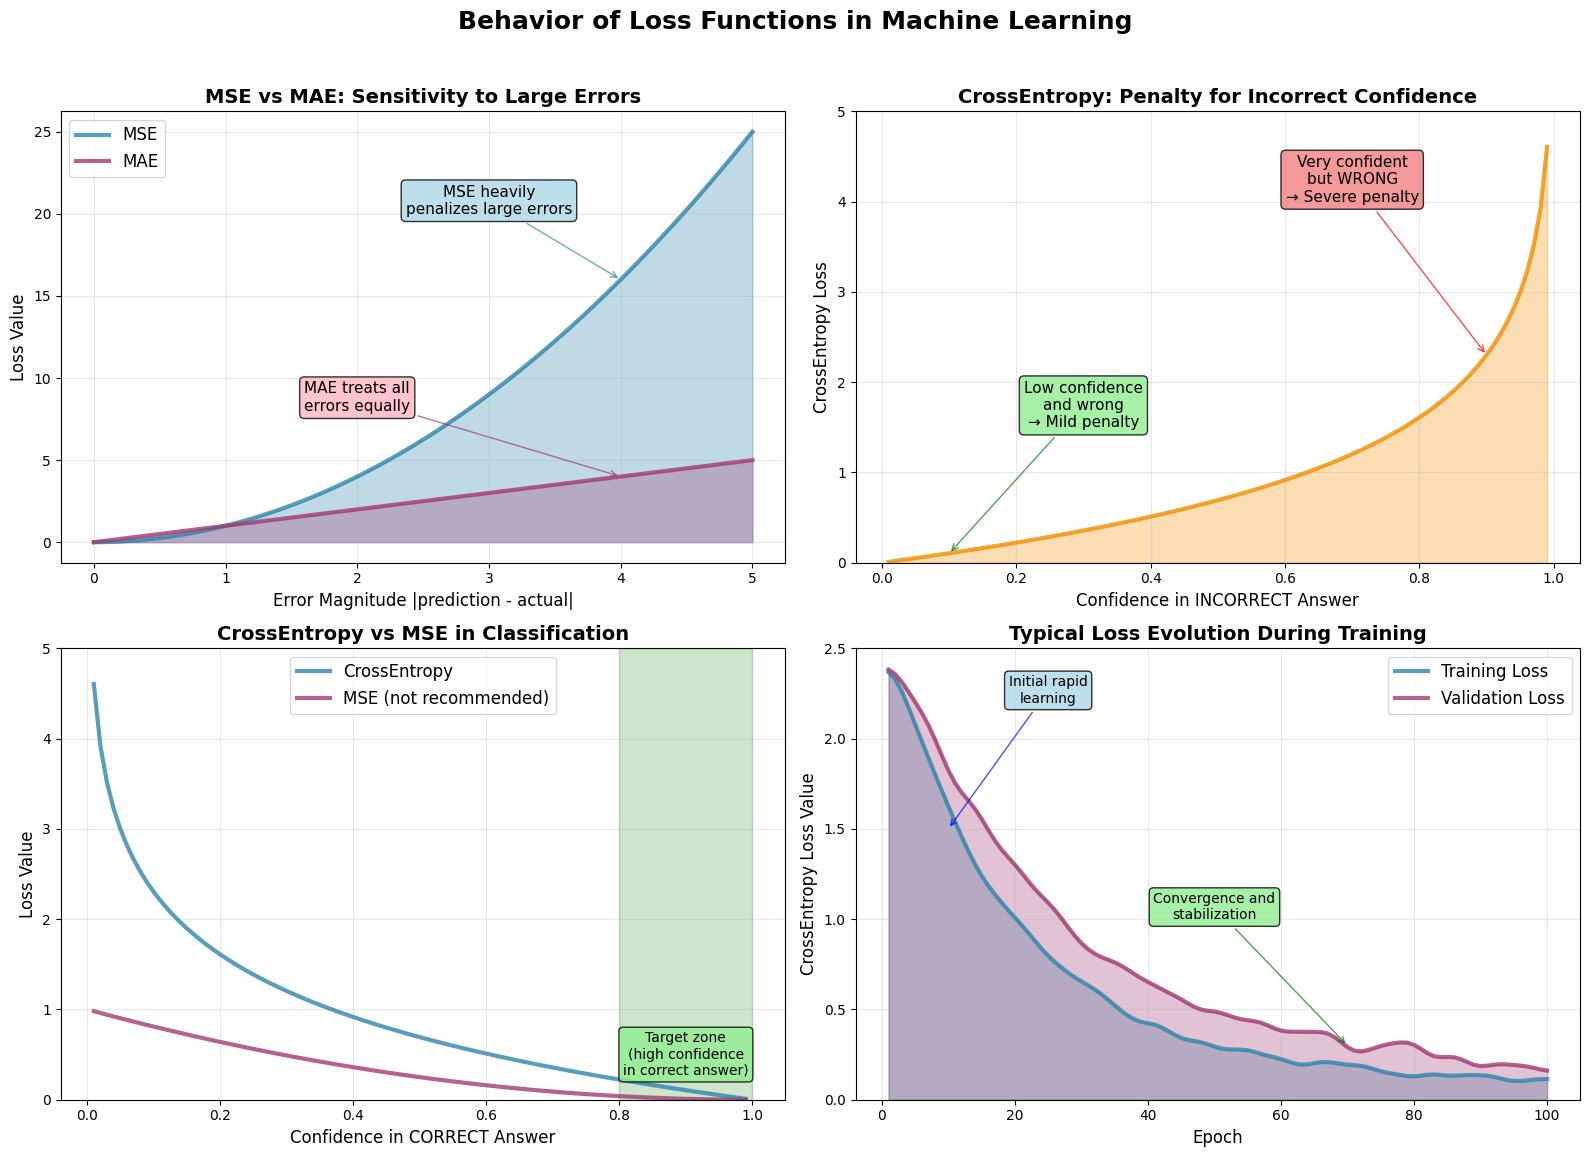

PRACTICAL DEMONSTRATION OF CROSSENTROPY
📊 EXAMPLE 1 - Very confident and CORRECT:
   Logits (raw scores): [5.0, 1.0, 0.5]
   Probabilities: ['0.971', '0.018', '0.011']
   Correct answer: Class 0
   Loss: 0.0290 (VERY LOW - Excellent!)

📊 EXAMPLE 2 - Very confident but INCORRECT:
   Logits (raw scores): [0.5, 1.0, 5.0]
   Probabilities: ['0.011', '0.018', '0.971']
   Correct answer: Class 0
   Loss: 4.5290 (VERY HIGH - Terrible!)

📊 EXAMPLE 3 - Uncertain but correct answer has higher probability:
   Logits (raw scores): [1.100000023841858, 1.0, 0.8999999761581421]
   Probabilities: ['0.367', '0.332', '0.301']
   Correct answer: Class 0
   Loss: 1.0019 (MODERATE - Acceptable)


In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


def visualize_loss_functions():
    """Visualizes the behavior of different loss functions"""

    # Configure subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Consistent colors
    colors = ["#2E86AB", "#A23B72", "#F18F01", "#2ecc71"]

    # 1. MSE vs MAE comparison (Regression)
    errors = np.linspace(0, 5, 100)
    mse_values = errors**2
    mae_values = np.abs(errors)

    ax1.plot(errors, mse_values, color=colors[0], linewidth=3, label="MSE", alpha=0.8)
    ax1.plot(errors, mae_values, color=colors[1], linewidth=3, label="MAE", alpha=0.8)
    ax1.fill_between(errors, 0, mse_values, alpha=0.3, color=colors[0])
    ax1.fill_between(errors, 0, mae_values, alpha=0.3, color=colors[1])

    ax1.set_title(
        "MSE vs MAE: Sensitivity to Large Errors", fontsize=14, fontweight="bold"
    )
    ax1.set_xlabel("Error Magnitude |prediction - actual|", fontsize=12)
    ax1.set_ylabel("Loss Value", fontsize=12)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)

    # Annotations
    ax1.annotate(
        "MSE heavily\npenalizes large errors",
        xy=(4, 16),
        xytext=(3, 20),
        arrowprops=dict(arrowstyle="->", color=colors[0], alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
    )

    ax1.annotate(
        "MAE treats all\nerrors equally",
        xy=(4, 4),
        xytext=(2, 8),
        arrowprops=dict(arrowstyle="->", color=colors[1], alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightpink", alpha=0.8),
    )

    # 2. CrossEntropy vs incorrect confidence
    incorrect_probabilities = np.linspace(0.01, 0.99, 100)
    cross_entropy_values = -np.log(
        1 - incorrect_probabilities
    )  # log of correct prob (1-p_incorrect)

    ax2.plot(
        incorrect_probabilities,
        cross_entropy_values,
        color=colors[2],
        linewidth=3,
        alpha=0.8,
    )
    ax2.fill_between(
        incorrect_probabilities, 0, cross_entropy_values, alpha=0.3, color=colors[2]
    )

    ax2.set_title(
        "CrossEntropy: Penalty for Incorrect Confidence", fontsize=14, fontweight="bold"
    )
    ax2.set_xlabel("Confidence in INCORRECT Answer", fontsize=12)
    ax2.set_ylabel("CrossEntropy Loss", fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 5)

    # Annotations for CrossEntropy
    ax2.annotate(
        "Very confident\nbut WRONG\n→ Severe penalty",
        xy=(0.9, 2.3),
        xytext=(0.7, 4),
        arrowprops=dict(arrowstyle="->", color="red", alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
    )

    ax2.annotate(
        "Low confidence\nand wrong\n→ Mild penalty",
        xy=(0.1, 0.1),
        xytext=(0.3, 1.5),
        arrowprops=dict(arrowstyle="->", color="green", alpha=0.7),
        fontsize=11,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
    )

    # 3. Comparison of loss functions for classification
    correct_confidence = np.linspace(0.01, 0.99, 100)
    cross_entropy_correct = -np.log(correct_confidence)
    mse_classification = (1 - correct_confidence) ** 2  # Simulating MSE in classification

    ax3.plot(
        correct_confidence,
        cross_entropy_correct,
        color=colors[0],
        linewidth=3,
        label="CrossEntropy",
        alpha=0.8,
    )
    ax3.plot(
        correct_confidence,
        mse_classification,
        color=colors[1],
        linewidth=3,
        label="MSE (not recommended)",
        alpha=0.8,
    )

    ax3.set_title(
        "CrossEntropy vs MSE in Classification", fontsize=14, fontweight="bold"
    )
    ax3.set_xlabel("Confidence in CORRECT Answer", fontsize=12)
    ax3.set_ylabel("Loss Value", fontsize=12)
    ax3.legend(fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 5)

    # Good performance region
    ax3.axvspan(0.8, 1.0, alpha=0.2, color="green", label="Target zone")
    ax3.text(
        0.9,
        0.5,
        "Target zone\n(high confidence\nin correct answer)",
        fontsize=10,
        ha="center",
        va="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
    )

    # 4. Practical example: Loss evolution during training
    epochs = np.arange(1, 101)

    # Simulate typical loss evolution
    np.random.seed(42)
    train_loss = 2.5 * np.exp(-epochs / 20) + 0.1 + 0.05 * np.random.normal(0, 1, 100)
    val_loss = 2.5 * np.exp(-epochs / 25) + 0.15 + 0.08 * np.random.normal(0, 1, 100)

    # Smooth the curves
    from scipy import ndimage

    train_loss_smooth = ndimage.gaussian_filter1d(train_loss, sigma=2)
    val_loss_smooth = ndimage.gaussian_filter1d(val_loss, sigma=2)

    ax4.plot(
        epochs,
        train_loss_smooth,
        color=colors[0],
        linewidth=3,
        label="Training Loss",
        alpha=0.8,
    )
    ax4.plot(
        epochs,
        val_loss_smooth,
        color=colors[1],
        linewidth=3,
        label="Validation Loss",
        alpha=0.8,
    )

    ax4.fill_between(epochs, 0, train_loss_smooth, alpha=0.3, color=colors[0])
    ax4.fill_between(epochs, 0, val_loss_smooth, alpha=0.3, color=colors[1])

    ax4.set_title(
        "Typical Loss Evolution During Training",
        fontsize=14,
        fontweight="bold",
    )
    ax4.set_xlabel("Epoch", fontsize=12)
    ax4.set_ylabel("CrossEntropy Loss Value", fontsize=12)
    ax4.legend(fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(0, 2.5)

    # Training phase annotations
    ax4.annotate(
        "Initial rapid\nlearning",
        xy=(10, 1.5),
        xytext=(25, 2.2),
        arrowprops=dict(arrowstyle="->", color="blue", alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
    )

    ax4.annotate(
        "Convergence and\nstabilization",
        xy=(70, 0.3),
        xytext=(50, 1.0),
        arrowprops=dict(arrowstyle="->", color="green", alpha=0.7),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
    )

    plt.suptitle(
        "Behavior of Loss Functions in Machine Learning",
        fontsize=18,
        fontweight="bold",
        y=0.98,
    )

    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    plt.show()


# Create the visualization
visualize_loss_functions()


# Practical example with real data
def demonstrate_crossentropy():
    """Demonstrates how CrossEntropy works with numerical examples"""

    print("PRACTICAL DEMONSTRATION OF CROSSENTROPY")
    print("=" * 45)

    # Create some examples
    criterion = nn.CrossEntropyLoss()

    # Example 1: Very confident and correct prediction
    logits1 = torch.tensor([[5.0, 1.0, 0.5]])  # Very sure of class 0
    target1 = torch.tensor([0])  # Correct answer: class 0
    loss1 = criterion(logits1, target1)
    probs1 = torch.softmax(logits1, dim=1)

    print("📊 EXAMPLE 1 - Very confident and CORRECT:")
    print(f"   Logits (raw scores): {logits1[0].tolist()}")
    print(f"   Probabilities: {[f'{p:.3f}' for p in probs1[0].tolist()]}")
    print(f"   Correct answer: Class {target1.item()}")
    print(f"   Loss: {loss1.item():.4f} (VERY LOW - Excellent!)")

    # Example 2: Confident but incorrect prediction
    logits2 = torch.tensor([[0.5, 1.0, 5.0]])  # Very sure of class 2
    target2 = torch.tensor([0])  # Correct answer: class 0
    loss2 = criterion(logits2, target2)
    probs2 = torch.softmax(logits2, dim=1)

    print(f"\n📊 EXAMPLE 2 - Very confident but INCORRECT:")
    print(f"   Logits (raw scores): {logits2[0].tolist()}")
    print(f"   Probabilities: {[f'{p:.3f}' for p in probs2[0].tolist()]}")
    print(f"   Correct answer: Class {target2.item()}")
    print(f"   Loss: {loss2.item():.4f} (VERY HIGH - Terrible!)")

    # Example 3: Uncertain prediction
    logits3 = torch.tensor([[1.1, 1.0, 0.9]])  # Not very sure
    target3 = torch.tensor([0])  # Correct answer: class 0
    loss3 = criterion(logits3, target3)
    probs3 = torch.softmax(logits3, dim=1)

    print(
        f"\n📊 EXAMPLE 3 - Uncertain but correct answer has higher probability:"
    )
    print(f"   Logits (raw scores): {logits3[0].tolist()}")
    print(f"   Probabilities: {[f'{p:.3f}' for p in probs3[0].tolist()]}")
    print(f"   Correct answer: Class {target3.item()}")
    print(f"   Loss: {loss3.item():.4f} (MODERATE - Acceptable)")


# Run the demonstration
demonstrate_crossentropy()